In [18]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # to separate pages based on language (regular expression)
import matplotlib.pyplot as plt # to visualize data
from pandas.plotting import autocorrelation_plot # to visualize and configure the parameters of ARIMA model
from statsmodels.tsa.arima_model import ARIMA # to make an ARIMA model that fits the data

In [19]:
url = "https://media.githubusercontent.com/media/Nageswari-droid/gitconvex-test/master/wiki.csv"
train_df = pd.read_csv(url).fillna(0)
train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [45]:
def find_language(url):
    res = re.search('[a-z][a-z].wikipedia.org',url)
    if res:
        return res[0][0:2]
    return 'na'

train_df['lang'] = train_df.Page.map(find_language)

In [46]:
lang_sets = {}
lang_sets['en'] = train_df[train_df.lang=='en'].iloc[:,0:-1]
lang_sets['ja'] = train_df[train_df.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train_df[train_df.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train_df[train_df.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train_df[train_df.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train_df[train_df.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train_df[train_df.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train_df[train_df.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]

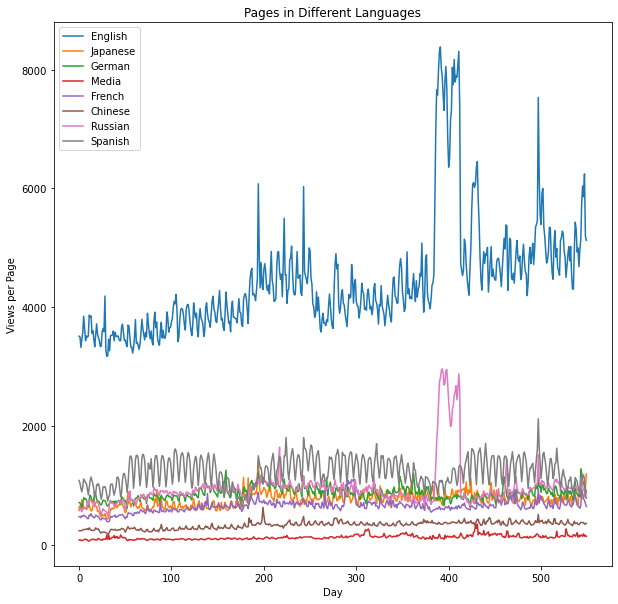

In [47]:
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }
        
for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

en


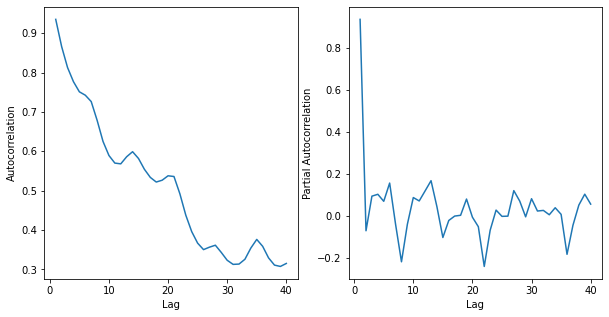

ja


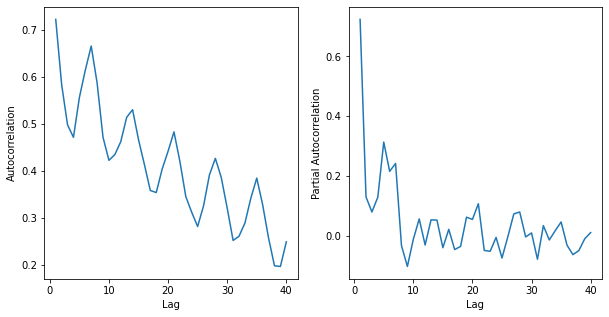

de


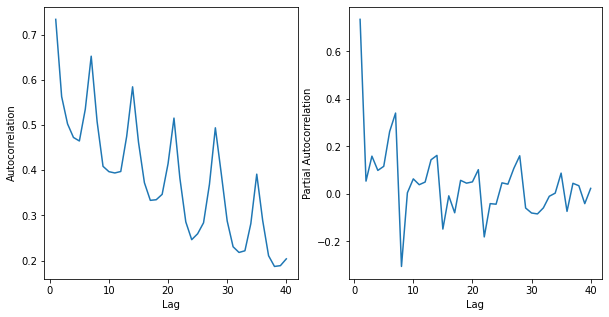

na


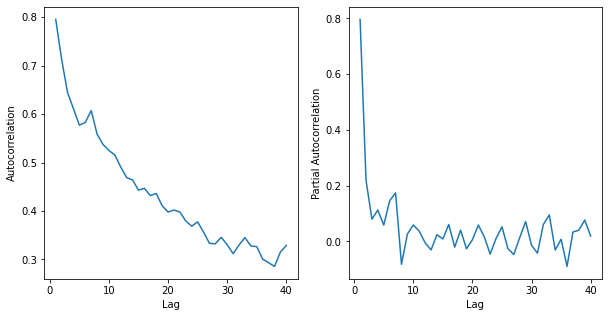

fr


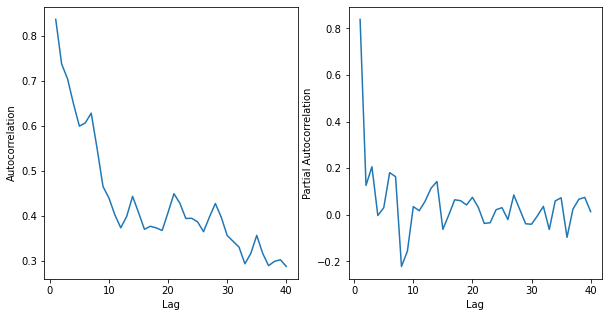

zh


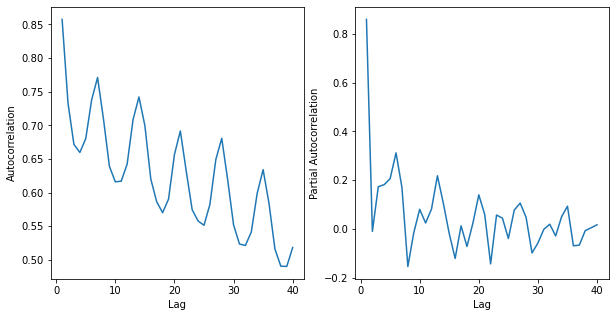

ru


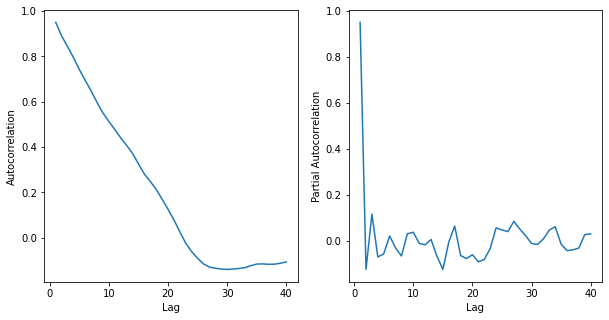

es


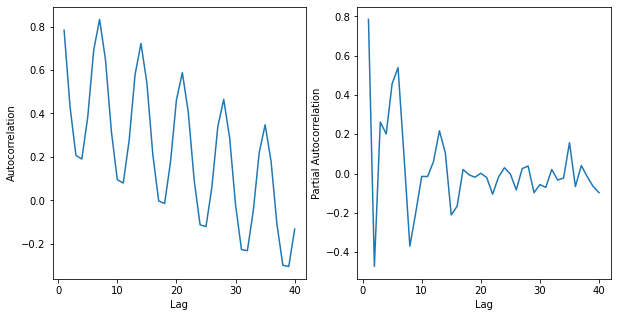

In [48]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf

for key in sums:
    fig = plt.figure(1,figsize=[10,5])
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    data = np.array(sums[key])
    autocorr = acf(data)
    pac = pacf(data)

    x = [x for x in range(len(pac))]
    ax1.plot(x[1:],autocorr[1:])

    ax2.plot(x[1:],pac[1:])
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')

    ax2.set_xlabel('Lag')
    ax2.set_ylabel('Partial Autocorrelation')
    print(key)
    plt.show()

warnings.filterwarnings('ignore')

Bias: -0.006581
MAE: 0.244664
MSE: 0.132406
RMSE: 0.363876


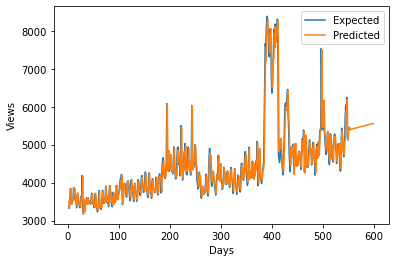

Bias: -0.001138
MAE: 0.060757
MSE: 0.006555
RMSE: 0.080965


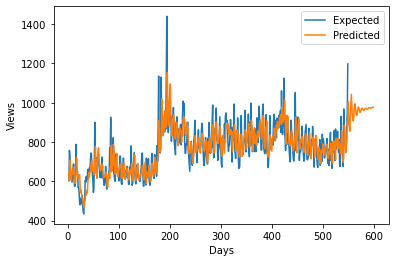

Bias: -0.001570
MAE: 0.058698
MSE: 0.006453
RMSE: 0.080331


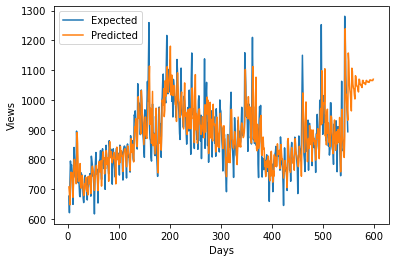

Bias: -0.000257
MAE: 0.011108
MSE: 0.000304
RMSE: 0.017432


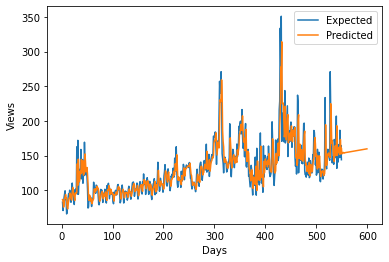

Bias: -0.000780
MAE: 0.032429
MSE: 0.002478
RMSE: 0.049784


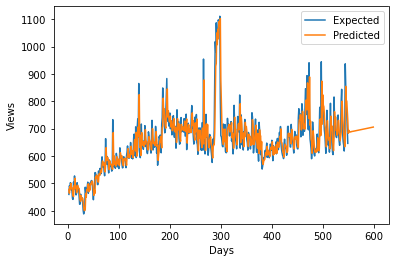

Bias: -0.000471
MAE: 0.023211
MSE: 0.001098
RMSE: 0.033134


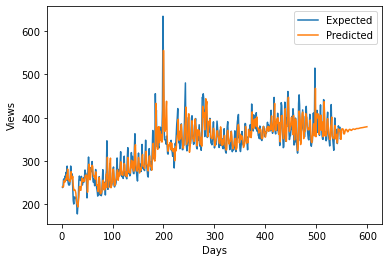

Bias: -0.000961
MAE: 0.067462
MSE: 0.017735
RMSE: 0.133172


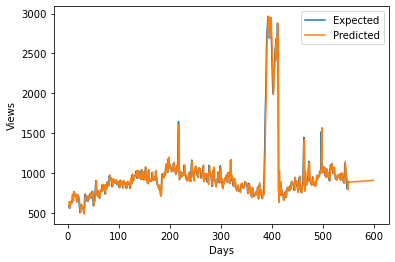

Bias: 0.000204
MAE: 0.188291
MSE: 0.054247
RMSE: 0.232909


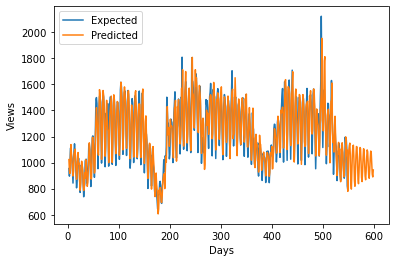

In [141]:
import math

f = open("C:\\Users\\neelu\\Desktop\\web traffic forecasting\\model\\ARIMA_hits.txt","w")

list_of_column_names = list(train_df.columns)
list_of_column_names.remove('Page')

params = {'en': [4,1,0], 'ja': [7,1,1], 'de': [7,1,1], 'na': [4,1,0], 'fr': [4,1,0], 'zh': [7,1,1], 'ru': [4,1,0], 'es': [7,1,1]}

lang_obj = {'en':'English','ja':'Japanese','de':'German','na':'Media','fr':'French','zh':'Chinese','ru':'Russian','es':'Spanish'}

for key in sums:
    
    for keys in lang_obj:
        if(keys == key):
            f.write(lang_obj[keys])
            f.write("\n")
    
    data = np.array(sums[key])
    f.write("Date         Expected         Predicted         Error")
    f.write("\n")
    
    result = None
    arima = ARIMA(data,params[key])
    result = arima.fit(disp=False)
    pred = result.predict(2,599,typ='levels')
    
    x = [i for i in range(600)]
    i=0
    for i in range(len(data)):
        f.write(str(list_of_column_names[i]) + "     " + str(math.ceil(data[i])) + "               " + str(math.ceil(pred[i])) +"           "+ str(np.sqrt(np.mean((math.ceil(data[i]) - math.ceil(pred[i])) ** 2))))
        f.write("\n")

    plt.plot(x[2:len(data)],data[2:] ,label='Expected')
    plt.plot(x[2:],pred,label='Predicted')
    plt.xlabel('Days')
    plt.ylabel('Views')
    plt.legend()
    plt.show()
    

warnings.filterwarnings('ignore')


In [157]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean

for key in sums:
    data = np.array(sums[key])
    
    result = None
    arima = ARIMA(data,params[key])
    result = arima.fit(disp=False)
    pred = result.predict(2,599,typ='levels')
    
    expected = []
    predictions = []

    for i in range(len(data)):
        predictions.append(pred[i]/1000)
        expected.append(data[i]/1000)
    
    bias = []
    mae = []
    mse = []
    rmse = []

    forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
    
    bias.append(sum(forecast_errors) * 1.0/len(expected))
    
    mae.append(mean_absolute_error(expected, predictions))
    
    mse.append(mean_squared_error(expected, predictions))
    
    mse_err = mean_squared_error(expected, predictions)
    rmse.append(sqrt(mse_err))
               
print('Bias: %f' % mean(bias))
print('MAE: %f' % mean(mae))
print('MSE: %f' % mean(mse))
print('RMSE: %f' % mean(rmse))

Bias: 0.000204
MAE: 0.188291
MSE: 0.054247
RMSE: 0.232909


In [9]:
train_df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,lang
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh


In [10]:
train_df = train_df.drop('Page',axis = 1)
train_df.shape

(145063, 551)

In [11]:
#Packages for pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

 # Importing the Keras libraries and packages for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

en
Forecast Errors: [-166.94245042004968, -336.3029991746125, -80.0001875106941, -58.491928047419606, 137.67986889401345, -263.5335777413097, -321.7019179075023, -100.1194663483725, -174.35491918041998, -141.22011673381257, 197.56302283441937, -88.82989640692404, -40.30931154855216, -347.25319647199603, -98.31172763741552, -277.1100874110125, -294.2642682716187, -8.113365668294591, 33.05878976733584, -270.04150876718813, -201.87290720404008, -216.09273430694702, -275.98162581534143, -205.0386843190022, 29.212201303444544, -75.54152079801042, -169.62836332370216, 467.27549428450857, -877.8723707995014, -338.34449315644724, -262.71027171348715, 15.16893692738131, -367.02687074019786, 18.44796252151764, -148.11659896189803, -144.7492797304708, -83.29818170122462, -294.7729456540619, -34.72226231146033, -201.63731279716558, -160.72470865966443, -145.04124607398217, -201.75311108151345, -203.49593325802107, -181.2768727655889, 49.69920874456875, -60.69797212187086, -224.89129730827153, -275

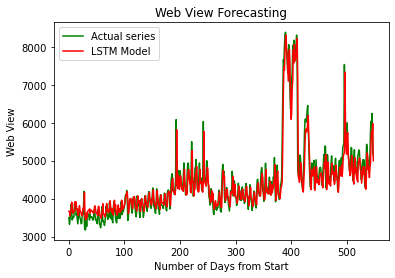

ja
Forecast Errors: [40.73975670193556, -82.33000730318759, 116.13698484786642, -23.86758667966069, -94.50112020169445, -45.63979370780385, -37.61652077658107, -50.490096949555436, -16.899247280074405, -12.296690266409314, 22.318785234949587, -87.15523957256278, -73.42222580501993, -46.34065113718316, 35.6594744313511, 109.11192480631269, -110.65284091571743, -32.103957488342985, -22.978580788715135, -105.06061138746634, -47.79650795259613, -77.49576313369255, -107.79782373206996, -89.42661654229767, -47.79095563542671, -86.20378379790037, -86.54795362035537, -36.45999167763796, -115.2295080116507, -112.8509610538166, -107.77352499736634, -49.59294216769723, -41.253711481800565, 15.747337617267817, -46.8143889710193, -11.446196812212406, -49.93882173630914, -21.154275805010457, 6.9277554868128846, -26.432892175808547, -52.517203913859476, 12.62968558867442, -22.90493002027017, 12.97005978380264, 39.012053563576046, 1.4334060828023212, -62.85770893531026, -53.16572931452208, -61.6850362

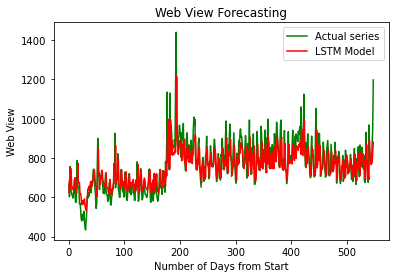

de
Forecast Errors: [-53.30761285675828, -75.99068910287463, -115.4946257404647, 16.13514478867239, 32.12648599396027, -36.0595236221028, -9.913692419038057, -45.99342034960489, -79.4064153777291, -101.67363637779295, 48.94950444731626, 48.740031899663904, -36.14672421779176, -63.51559479340597, -37.89952104103338, -12.018941841325045, 109.34566684352069, -27.11348382735207, -64.54356434873966, -71.96050508071028, -25.93372851636218, -55.62992443500798, -80.16130275132934, -62.92513937550859, -30.137692551487703, 2.226796860257082, -33.29792392471768, -31.58458762493592, -63.43739553237526, -89.13116658122772, -77.00147259367145, -46.762288986257886, -32.39796972066529, -6.173066302786083, -62.464087222743046, -38.60663030032754, -26.990201917473428, -106.02402588851544, 11.272619509777996, -65.87592825959257, -21.433820919777872, -31.424148715062415, -19.922210481100365, -64.08861947302591, -82.70410953619842, 74.46784755044303, -20.414263761017196, -26.397231733984768, -54.3051932161

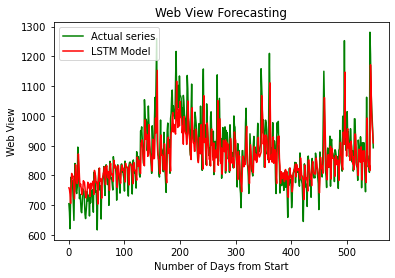

na
Forecast Errors: [-7.491468877693549, -15.163593805206816, -23.817168024640495, -7.620803548000467, -1.485093695801595, -4.5392267368715125, -4.2098025772492065, -19.943461446513723, -9.746923609348741, -32.06206562914991, -14.540548192443254, -4.281247721223124, -2.532771853765027, -4.488952461954128, -12.055977753463225, -0.7009421629252728, -17.170716109285166, -16.904247460195705, -11.612803669130727, 7.946868061972609, 1.3385289944510106, -17.872888448945417, -13.161859206918308, -17.54373344137234, -15.541576580559294, 8.489223545814752, -12.356244148162531, -1.876168071626111, -11.452238044322158, 57.94296537648728, -60.091583671559135, 68.92537321305949, -67.42986257398739, 7.912087494810905, -1.964644807608849, 13.175974329871252, -2.1119600157682896, 29.92730735793765, -35.49819391058861, 15.813447590456462, 9.76357265142326, -31.460698568984526, 11.048460345453861, -5.85566091246379, 46.155514568242324, -18.231112940095784, -17.083971791947064, 1.1267631763638803, 1.14209

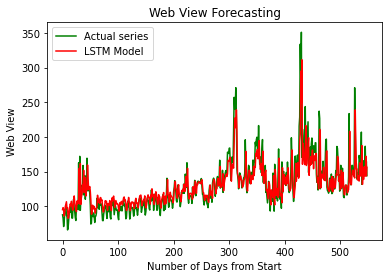

fr
Forecast Errors: [-33.3263815723501, -53.6963989271527, -10.072001036466247, -39.81633815201815, -13.66992395956214, -44.00662697386093, -41.66109175211176, -40.68028434305137, -64.0105890167548, -50.95297288525012, 14.246349355716688, -39.28254864106299, 4.809228746024019, -60.38488811359633, -43.303380623545195, -53.97136740775045, -36.81081002696874, -1.4151197467114116, -39.738768660396715, -44.11805218185634, -32.64746457176949, -62.48266218935635, -73.28008168521268, -54.34673423925659, -18.80815650966514, -55.562204146462875, -52.10467607467956, -42.316844285759885, -66.55447322209892, -79.80629173512807, -76.82812478057241, -62.19503716637132, -58.129270345518364, 18.78812204362464, -49.757434652543, -29.73118690565292, -29.96176793058055, -28.51006272996011, -15.702990641742304, -67.20389250971846, -25.119204797285136, -37.369172263715996, -12.499998182865227, -26.076332495997633, -24.16514248146717, -21.28661621148609, -26.438508564642916, -40.64437982438989, -55.960340156

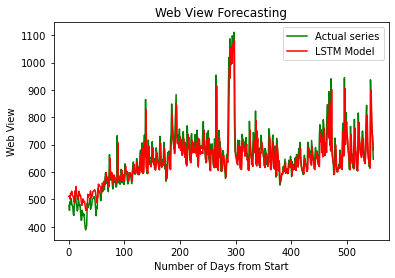

zh
Forecast Errors: [-6.936688524507815, -8.801070558553619, -5.310070805032353, 9.107096901495709, -1.7222632128554665, -3.0301366778685974, 3.9443571628838754, -2.908992632051593, 8.805033571355182, -17.74495014055833, 28.963348455980963, -20.386387697423856, -16.160476926351578, -9.735309776852148, -6.725088061164939, -5.210967963553742, 4.352809693672327, 29.14600081247005, -13.791909358375392, -4.4164486490460035, 2.3566073821130544, -29.99629926230392, -38.92390166193039, -24.205726786936793, -2.7612415216078148, -13.84095743524611, -16.61982361101994, -12.537668393654457, -22.361163463987737, -28.562399659003745, -38.23140872204959, -9.57683105752156, 0.9484878735766813, 25.065440171773332, 6.0145002300128, -7.092748118661916, -6.993138368148124, -4.045493465394571, 6.1853564434703685, -18.528934010031804, -8.375577624298444, 1.0652665196863325, 4.522116153873583, -11.775794498904816, 6.045157049348347, 15.332130415744473, -4.936288829964894, -2.0765248597052164, -17.99127097541

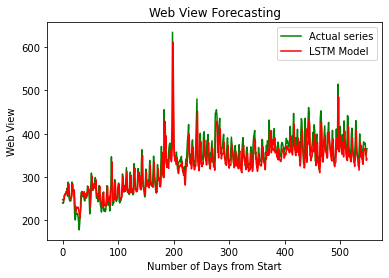

ru
Forecast Errors: [-32.78541767484512, -87.28303140420087, -90.01466577860288, -29.532854482696166, -8.447795251859816, -55.07423948781366, -47.743981979099885, -30.51049265926906, 51.58939379957576, -72.2573980200134, 40.63199926403513, 12.8108844739304, -27.75712645379224, -42.55661569411734, -5.452860950423769, -24.615975223643318, -92.36641150596313, 29.565414906119486, -0.9555409634228909, -33.88783086401668, -36.87121548714231, -95.0693142489323, -115.80729824610103, -116.20395670659593, -24.05951668022317, -18.53894977470543, -72.1103854077171, -68.24503368367016, -74.43896698091498, -74.78140870278276, -125.54885891480257, -30.589777749795076, 80.48638812001514, 13.36497092675529, -44.965176595160415, -18.064410072908686, -20.887960735387537, -80.36524477641126, -8.788636432191083, -33.94753013776415, 0.01679157515593488, -2.151715179715552, -0.8724570580986892, -5.200525801090748, -66.56277024166639, 2.35941298952946, 22.196113554937142, 8.775607405037704, -89.27547663166933

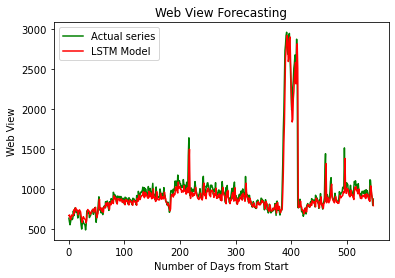

es
Forecast Errors: [-186.10341192293345, -269.5052883889225, -327.86721887438694, -249.4097592112979, -113.28082325280752, -141.34962700573965, -173.248411567542, -193.07668649824086, -286.78803769590945, -381.1093114182778, -263.67132719765084, -134.55241327342037, -79.89216734265051, -142.73430253349557, -194.39589895115137, -297.37265636105974, -417.76074364515955, -361.6205773220378, -210.95038043526552, -220.5214231532981, -191.3652642223151, -255.12978195634014, -363.4158008631566, -452.8388586497797, -373.52696725735655, -244.49306292869073, -251.76642990573248, -240.85655713581275, -288.89472615990826, -379.16617402400664, -486.12828931293984, -414.0546522385208, -389.26248506246, -211.4513399917372, -199.26973504469038, -198.45837673919618, -312.74595936767, -385.6366410081562, -307.32986725024875, -244.155725520204, -86.59584208854585, -79.92003001945773, -120.37038185683059, -281.4719526863139, -407.61190577466414, -335.93182901014643, -128.82649103303356, -27.3005119300412

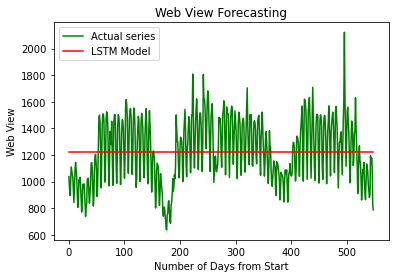

In [128]:
  from sklearn.metrics import accuracy_score
  import numpy as np

  for key in sums:
    row = [0]*sums[key].shape[0]
    for i in range(sums[key].shape[0]):
        row[i] = sums[key][i]


    #Using Data From Random Row for Training and Testing

    X = row[0:549]
    y = row[1:550]

    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    # Feature Scaling
    sc = MinMaxScaler()
    X_train = np.reshape(X_train,(-1,1))
    y_train = np.reshape(y_train,(-1,1))
    X_train = sc.fit_transform(X_train)
    y_train = sc.fit_transform(y_train)


    #Training LSTM

    #Reshaping Array
    X_train = np.reshape(X_train, (384,1,1))

    # Initialising the RNN
    regressor = Sequential()

    # Adding the input layerand the LSTM layer
    regressor.add(LSTM(units = 8, activation = 'relu', input_shape = (None, 1)))


    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'rmsprop', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    regressor.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

    # Getting the predicted Web View
    inputs = X
    inputs = np.reshape(inputs,(-1,1))
    inputs = sc.transform(inputs)
    inputs = np.reshape(inputs, (549,1,1))
    y_pred = regressor.predict(inputs)
    y_pred = sc.inverse_transform(y_pred)

    print(key)

    b = np.reshape(y_pred, (np.product(y_pred.shape),))
    
#     expected = y
#     predictions = b
#     forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
#     print('Forecast Errors: %s' % forecast_errors)
    
#     bias = sum(forecast_errors) * 1.0/len(expected)
#     print('Bias: %f' % bias)

    # expected = y
    # predictions = y_pred
    # mse = mean_squared_error(expected, predictions)
    # rmse = sqrt(mse)
    # print('Performance ',  int(rmse * 0.1), "%")
    
    # error = ((abs(pred_value - original_value)) / original_value) * 100
    # error_list.append(error)

    # Visualising Result
    plt.figure
    plt.plot(y, color = 'green', label = 'Actual series')
    plt.plot(y_pred, color = 'red', label = 'LSTM Model')
    plt.title('Web View Forecasting')
    plt.xlabel('Number of Days from Start')
    plt.ylabel('Web View')
    plt.legend()
    plt.show()
    

warnings.filterwarnings('ignore')